## Decision tree wlassifier with Scikit-learn

In [747]:
import pandas as pd

### Load dataset

In [748]:
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")

In [749]:
len(train_df), len(test_df)

(891, 418)

In [750]:
train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

In [751]:
all_df =train_df.append(test_df).set_index('PassengerId')
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


### 데이터 전처리

In [752]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450


In [753]:
all_df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [754]:
all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

all_df.isnull().sum()

Age            0
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [755]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,1
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,1
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,0


In [756]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

In [757]:
all_df["Name"].unique().tolist()[-10:]

['Riordan, Miss. Johanna Hannah""',
 'Peacock, Miss. Treasteall',
 'Naughton, Miss. Hannah',
 'Minahan, Mrs. William Edward (Lillian E Thorpe)',
 'Henriksson, Miss. Jenny Lovisa',
 'Spector, Mr. Woolf',
 'Oliva y Ocana, Dona. Fermina',
 'Saether, Mr. Simon Sivertsen',
 'Ware, Mr. Frederick',
 'Peter, Master. Michael J']

In [758]:
all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [759]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

In [760]:
all_df[all_df["social_status"] == "0"]["Name"]

PassengerId
31                               Uruchurtu, Don. Manuel E
370                         Aubart, Mme. Leontine Pauline
450                        Peuchen, Major. Arthur Godfrey
537                     Butt, Major. Archibald Willingham
642                                  Sagesser, Mlle. Emma
746                          Crosby, Capt. Edward Gifford
760     Rothes, the Countess. of (Lucy Noel Martha Dye...
823                       Reuchlin, Jonkheer. John George
1306                         Oliva y Ocana, Dona. Fermina
Name: Name, dtype: object

In [761]:
all_df.iloc[train_id-1].isnull().sum()

Age                0
Cabin            687
Embarked           2
Fare               0
Name               0
Parch              0
Pclass             0
Sex                0
SibSp              0
Survived           0
Ticket             0
cabin_count        0
social_status      0
dtype: int64

In [762]:
all_df[all_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,1,0,1.0,113572,1,Miss
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,1,0,1.0,113572,1,Mrs


## Drop Embarked

In [763]:
all_df =all_df.drop([62,830])

In [764]:
all_df.isnull().sum()

Age                 0
Cabin            1014
Embarked            0
Fare                1
Name                0
Parch               0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Ticket              0
cabin_count         0
social_status       0
dtype: int64

In [765]:
import numpy as np 

train_id = np.delete(train_id, [62-1,830-1])

In [766]:
all_df.iloc[:len(train_id)].isnull().sum()

Age                0
Cabin            687
Embarked           0
Fare               0
Name               0
Parch              0
Pclass             0
Sex                0
SibSp              0
Survived           0
Ticket             0
cabin_count        0
social_status      0
dtype: int64

In [767]:
all_df[all_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,0,0,NaN,3701,0,Mr


In [768]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [769]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

In [770]:
all_df.isnull().sum()

Age                 0
Cabin            1014
Embarked            0
Fare                0
Name                0
Parch               0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Ticket              0
cabin_count         0
social_status       0
dtype: int64

In [771]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,0,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,1,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,0,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,1,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,0,Mr


In [772]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [773]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,0,Mr,99
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,1,Mrs,C
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,0,Miss,99
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,1,Mrs,C
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,0,Mr,99


In [774]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

In [775]:
all_df.loc[train_id]["Survived"].isnull().sum()

0

In [776]:
y = all_df.loc[train_id, "Survived"].values
y[:100]

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.])

In [777]:
len(y), len(train_id)

(889, 889)

In [778]:
del all_df["Survived"]

### OneHot Encoding

In [779]:
X_df = pd.get_dummies(all_df)
X_df 

,Age,Fare,Parch,Pclass,Sex,SibSp,cabin_count,Embarked_C,Embarked_Q,Embarked_S,...,social_status_Rev,cabin_type_99,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.000000,7.2500,0,3,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,38.000000,71.2833,0,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,26.000000,7.9250,0,3,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,35.000000,53.1000,0,1,1,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,35.000000,8.0500,0,3,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6,24.816367,8.4583,0,3,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7,54.000000,51.8625,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,2.000000,21.0750,1,3,0,3,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9,27.000000,11.1333,2,3,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [789]:
X = X_df.values

In [790]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [791]:
X

array([[ 0.27345609,  0.01415106,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.473882  ,  0.13913574,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32356257,  0.01546857,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.48014531,  0.01415106,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30873565,  0.01571255,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30873565,  0.0436405 ,  0.11111111, ...,  0.        ,
         0.        ,  0.        ]])

In [792]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

In [793]:
len(X_train), len(y)

(889, 889)

In [795]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [796]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

In [797]:
c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [798]:
params

[[{'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
   'penalty': ['l1'],
   'solver': ['saga']},
  {'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
   'penalty': ['l2'],
   'solver': ['liblinear']}],
 {'criterion': ['gini', 'entropy'],
  'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [799]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=4)
    print(gs_estimator)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'solver': ['saga'], 'penalty': ['l1'], 'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}, {'solver': ['liblinear'], 'penalty': ['l2'], 'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/mini

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10, 8, 7, 6, 5, 4, 3, 2], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    0.6s finished


In [800]:
estimator_results[0].best_score_

0.82677165354330706

In [801]:
estimator_results[1].best_score_

0.83577052868391455

In [802]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])
    print(number_of_estimators)

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    print(len(result_dict["solver"]))
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

14
14
144
14


In [803]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=10)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
137,DecisionTreeClassifier,0.835771,None,None,NaN,entropy,4.0,7.0
138,DecisionTreeClassifier,0.835771,None,None,NaN,entropy,4.0,8.0
139,DecisionTreeClassifier,0.834646,None,None,NaN,entropy,4.0,9.0
135,DecisionTreeClassifier,0.834646,None,None,NaN,entropy,4.0,5.0
136,DecisionTreeClassifier,0.832396,None,None,NaN,entropy,4.0,6.0
102,DecisionTreeClassifier,0.831271,None,None,NaN,entropy,8.0,8.0
131,DecisionTreeClassifier,0.831271,None,None,NaN,entropy,4.0,1.0
66,DecisionTreeClassifier,0.830146,None,None,NaN,gini,4.0,8.0
132,DecisionTreeClassifier,0.830146,None,None,NaN,entropy,4.0,2.0
133,DecisionTreeClassifier,0.830146,None,None,NaN,entropy,4.0,3.0


In [804]:
estimator_results[1].best_estimator_.feature_importances_

array([ 0.08742618,  0.18883257,  0.        ,  0.13376524,  0.06257368,
        0.        ,  0.01350244,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.5138999 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [805]:
estimator_results[0].best_estimator_.coef_

array([[-2.19185199,  1.27767699, -2.410666  , -1.73402055,  2.24871447,
        -3.6507893 , -0.45084807,  0.50596033,  0.34796529,  0.07057546,
        -0.60628335,  0.33768239, -0.0652234 ,  2.50565419,  0.07097905,
        -0.57552062,  0.75801616, -1.50080334, -0.41747771,  0.16045469,
         0.32518842, -0.10809994,  0.84396811,  1.1312503 ,  0.53153587,
        -0.733188  , -0.80913066]])

pydot를 사용하여 결정 트리를 츨력한다.

In [807]:
best_tree = estimator_results[1].best_estimator_
column_names=  pd.get_dummies(all_df).columns

In [808]:
column_names

Index(['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

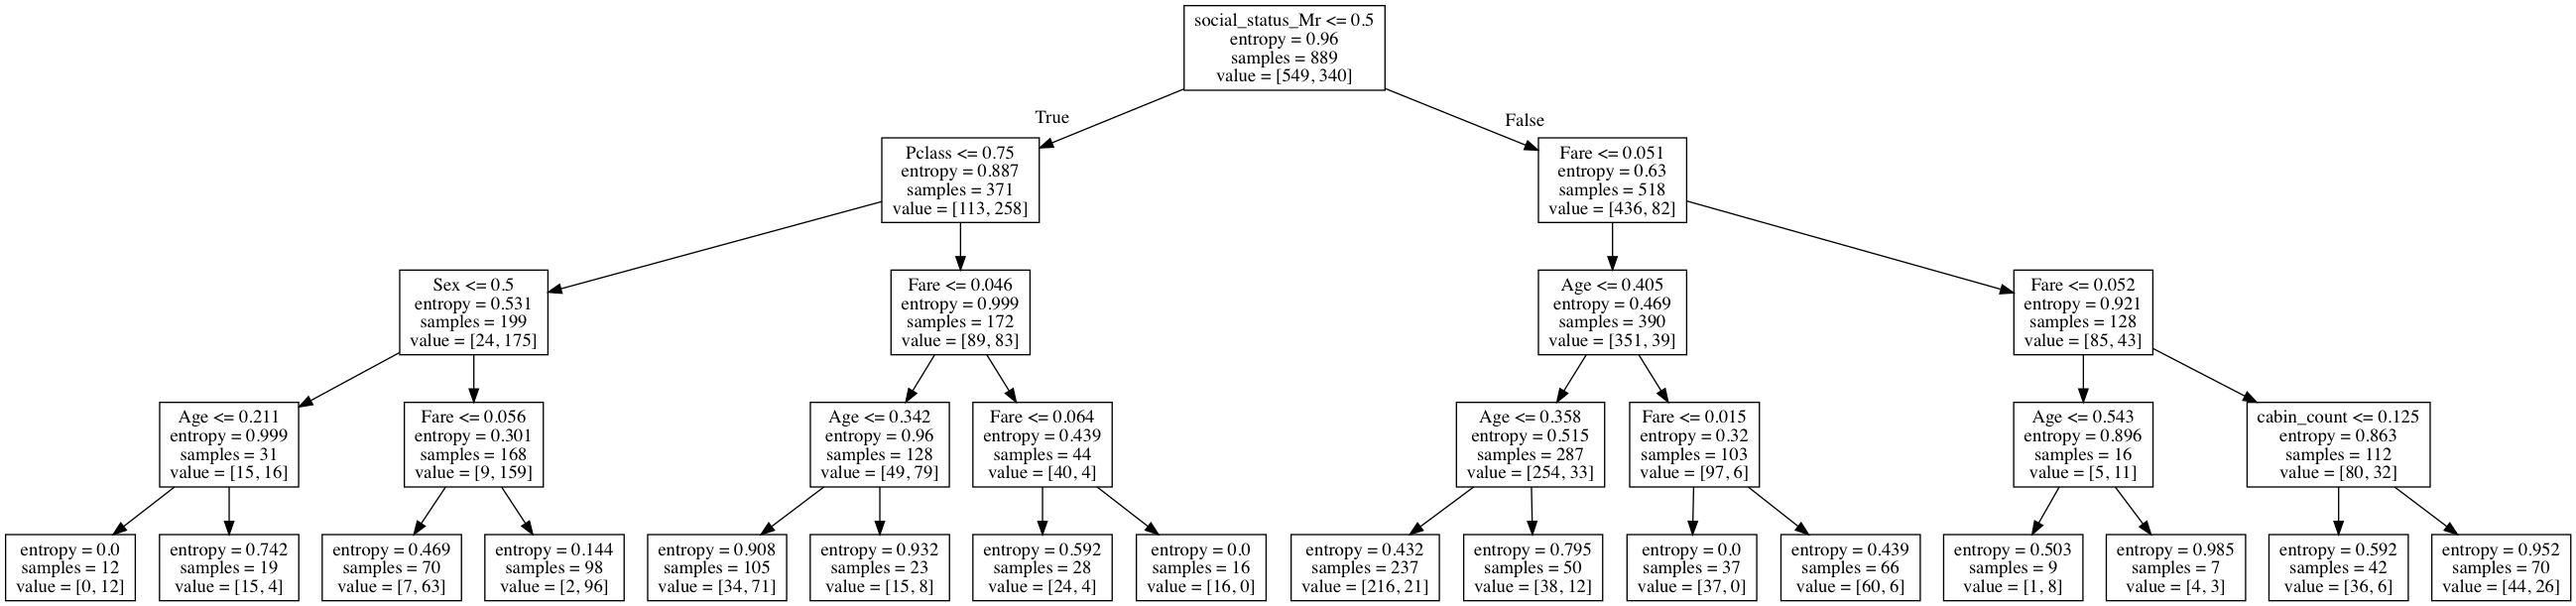

In [809]:
import pydotplus
from sklearn.externals.six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(best_tree, out_file=dot_data, feature_names=column_names) 

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
from IPython.core.display import Image 
Image(filename='titanic.png')

In [817]:
len(test_id), len(best_tree.predict(X_test))

(418, 418)

In [818]:
test_id.dtype="int"

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [832]:
clf = estimator_results[0].best_estimator_

result = np.concatenate( (test_id.reshape(-1,1),
                 clf.predict(X_test).reshape(-1,1)  ) , axis=1)
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"],dtype=int)
df_submssion.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [833]:
df_submssion.to_csv("submission_result.csv",index=False)


In [831]:
!kaggle competitions submit -c titanic -f rental_price.csv -m "My submission message"


Successfully submitted to Titanic: Machine Learning from Disaster